<a href="https://colab.research.google.com/github/MarteDevs/Relaciones-con-regresion-lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [109]:
#Leyendo los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv('/content/precios_casas.csv')
datos.head()

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [110]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [111]:
# para nuestro modelado no necesitamos id
datos = datos.drop(columns='Id')

In [112]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [113]:
# Correlación
# precio de venta es la variable dependiente
corr = datos.corr()

In [114]:
# Accedemos a la columna 'precio_de_venta' del DataFrame de correlación 'corr'.
# Esto nos muestra los coeficientes de correlación de Pearson entre 'precio_de_venta' y todas las demás columnas.
# Un coeficiente cercano a 1 indica una fuerte correlación positiva (cuando una aumenta, la otra también).
# Un coeficiente cercano a -1 indica una fuerte correlación negativa (cuando una aumenta, la otra disminuye).
# Un coeficiente cercano a 0 indica poca o ninguna relación lineal.
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


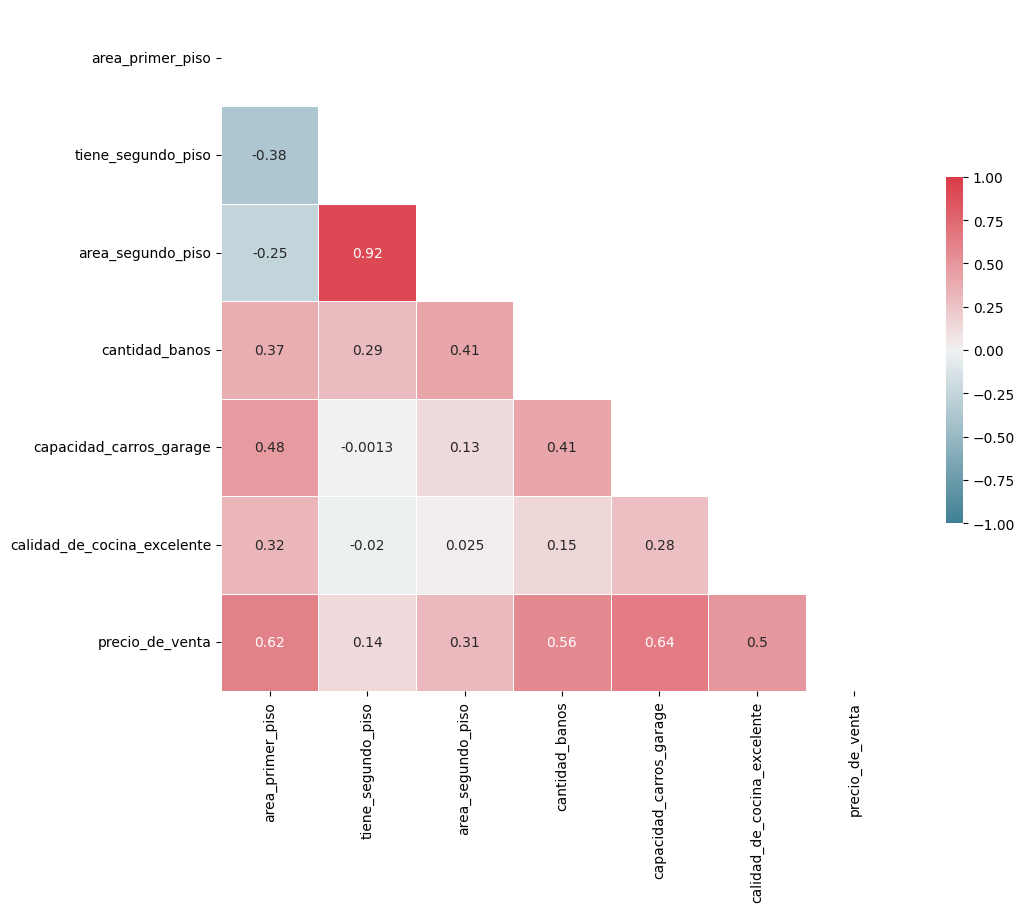

In [115]:
# Actividad
# Cuáles factores están más correlacionados?
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

## Relacionando variables

In [116]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

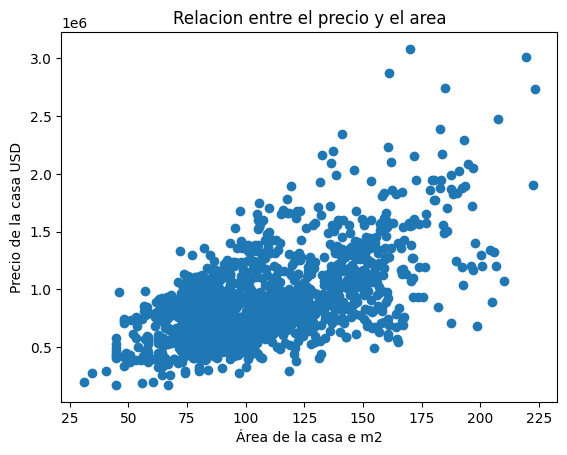

In [117]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.title('Relacion entre el precio y el area')
plt.xlabel('Área de la casa e m2')
plt.ylabel('Precio de la casa USD')
plt.show()

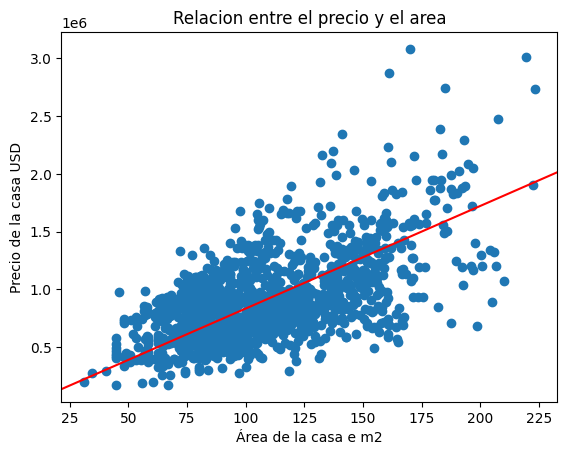

In [118]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.axline(xy1=(40,300000), xy2=(175,1500000), color='red')
plt.title('Relacion entre el precio y el area')
plt.xlabel('Área de la casa e m2')
plt.ylabel('Precio de la casa USD')
plt.show()

## Mejor recta

In [119]:
# Cuál es la recta que mejor se ajusta a esta relación
# metodo de minimo cuadrado ordinario, hallar la variable minima
px.scatter(datos, x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

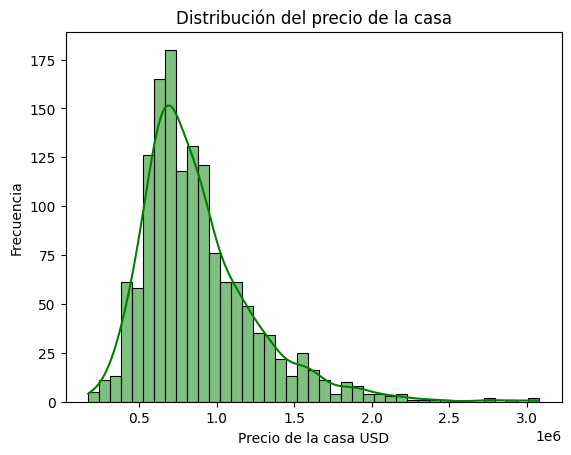

In [120]:
#Quién es nuestra variable de respuesta?
# creamos un histograma
sns.histplot(datos['precio_de_venta'], kde =True, color = 'green')
plt.title('Distribución del precio de la casa')
plt.xlabel('Precio de la casa USD')
plt.ylabel('Frecuencia')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [121]:
# Importamos la función train_test_split desde scikit-learn.
# Esta función sirve para dividir un conjunto de datos en dos partes:
# - Conjunto de entrenamiento (para ajustar/entrenar el modelo)
# - Conjunto de prueba (para evaluar el rendimiento fuera de muestra)
from sklearn.model_selection import train_test_split

# Definimos la variable objetivo (y), es decir, lo que queremos predecir.
# Aquí 'precio_de_venta' es la columna del DataFrame 'datos' que contiene los precios reales.
y = datos['precio_de_venta']

# Definimos las variables predictoras (X), es decir, los atributos/columnas que usaremos para predecir y.
# Eliminamos la columna objetivo del DataFrame para evitar fuga de información (data leakage).
x = datos.drop(columns='precio_de_venta')

# Dividimos el dataset en entrenamiento y prueba.
# - x: características (features) completas
# - y: objetivo (target)
# - test_size=0.3: el 30% de las filas se reservarán para el conjunto de prueba; el 70% restante será para entrenamiento.
# - random_state=230: fija la semilla de aleatoriedad para que la partición sea reproducible (misma división cada vez).
# La función devuelve cuatro subconjuntos:
#   x_train: características para entrenar el modelo
#   x_test:  características para evaluar (nunca usadas en el entrenamiento)
#   y_train: objetivo correspondiente a x_train
#   y_test:  objetivo correspondiente a x_test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=230
)

# Nota práctica:
# - Mantener separado x_test/y_test asegura una evaluación honesta y no sesgada del modelo.
# - Si tu dataset es desbalanceado por clases (clasificación), considera usar 'stratify=y' para mantener proporciones.
# - Para series temporales, NO uses train_test_split aleatorio; divide respetando el tiempo.


In [122]:
#Datos de entrenamiento para usar la fórmula

# 1) Creamos un nuevo DataFrame llamado 'df_train' a partir de x_train.
#    x_train es el conjunto de características (variables predictoras) que obtuviste
#    después de dividir los datos con train_test_split.
#    Lo convertimos explícitamente a DataFrame por si x_train fuera, por ejemplo,
#    un objeto tipo NumPy array o un DataFrame con índices diferentes.
df_train = pd.DataFrame(x_train)

# 2) Añadimos una nueva columna llamada 'precio_de_venta' al DataFrame 'df_train'.
#    Esta columna corresponde a y_train, que es el vector con los valores reales de la
#    variable objetivo (lo que queremos predecir) para las filas de entrenamiento.
#    Esto junta en un solo DataFrame las variables de entrada (features) y la salida (target).
df_train['precio_de_venta'] = y_train

# 3) Mostramos las primeras 5 filas del DataFrame combinado con head().
#    Esto nos permite verificar que la unión se hizo correctamente y que tenemos
#    tanto las variables predictoras como la variable objetivo en el mismo conjunto.
df_train.head()

,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
1303,65.7732,0,0.0000,1,0,0,406725.0
326,55.3684,1,55.3684,1,189,0,384540.0
386,74.6916,1,107.4853,2,560,0,1059950.0
615,103.6764,0,0.0000,1,440,0,788800.0
236,94.2006,1,67.8170,2,457,0,958885.0


In [123]:
# import ols
from statsmodels.formula.api import ols

In [124]:
# ajustando el primer modelo
# ols (Ordinary Least Squares) es un método para estimar los parámetros desconocidos en un modelo de regresión lineal.
# 'precio_de_venta ~ area_primer_piso' define la fórmula del modelo: precio_de_venta es la variable dependiente y area_primer_piso es la variable independiente.
# data=df_train especifica el DataFrame que contiene los datos de entrenamiento.
# .fit() ajusta el modelo a los datos de entrenamiento, calculando los coeficientes de la regresión.
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()


## Analizando los coeficientes

(intensidad, dirección y significancia)




In [125]:
# visualizando los parámetros
modelo_0.params
# la intercepcion es cuando la linea toca con el eje x
# area de primer piso muestra la pendiente, o el efecto, que muestra cuanto se diferencia

,0
Intercept,152909.288334
area_primer_piso,6793.641641


In [126]:
# El resumen del modelo
# .summary() genera un resumen detallado de los resultados del modelo ajustado, incluyendo coeficientes, R-cuadrado, p-valores, etc.
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          2.22e-105
Time:                        15:08:52   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [127]:
# observando el R²
round(modelo_0.rsquared,2)
# quiere decir que se ajusta a un 37% explica el 37$ de variacion de precio

# Según la definición de R² que mencionaste, esto significa que aproximadamente el 37.7% de
# la variación observada en los precios de las casas puede ser explicada por la variación en el área del primer piso.

#un R² de 0.377 indica que todavía hay una cantidad significativa de variación (alrededor del 62.3%)
#en el precio de las casas que no está siendo capturada por este modelo simple que solo considera el área del primer piso

np.float64(0.38)

## Entendiendo el resíduo

In [128]:
# Quiénes son los residuos?
# Los residuos son las diferencias entre los valores reales de la variable dependiente (precio_de_venta)
# y los valores predichos por el modelo (modelo_0).
# Representan la parte de la variable dependiente que el modelo no puede explicar.
# Podemos acceder a los residuos de nuestro modelo ajustado (modelo_0) usando el atributo .resid

residuos = modelo_0.resid
residuos
# es la diferencia entre la recta y el punto de dsitribucion

# Cómo están distribuidos

# Ahora podemos mostrar los primeros residuos para tener una idea
print("Primeros 5 residuos:")
print(residuos.head())

Primeros 5 residuos:
1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
dtype: float64


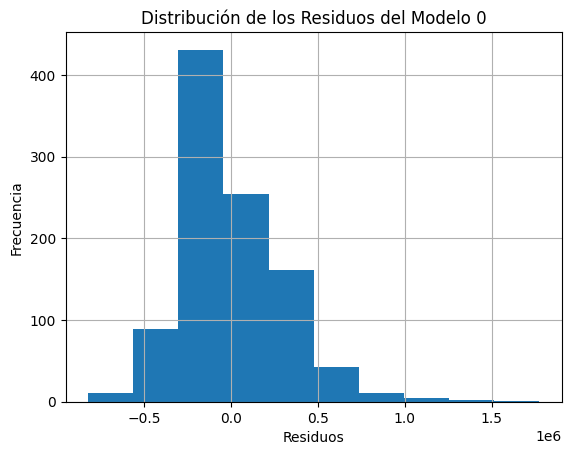

In [129]:
modelo_0.resid.hist()
plt.title('Distribución de los Residuos del Modelo 0')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()
# mientras sea menor el residuo mejor son los resultados

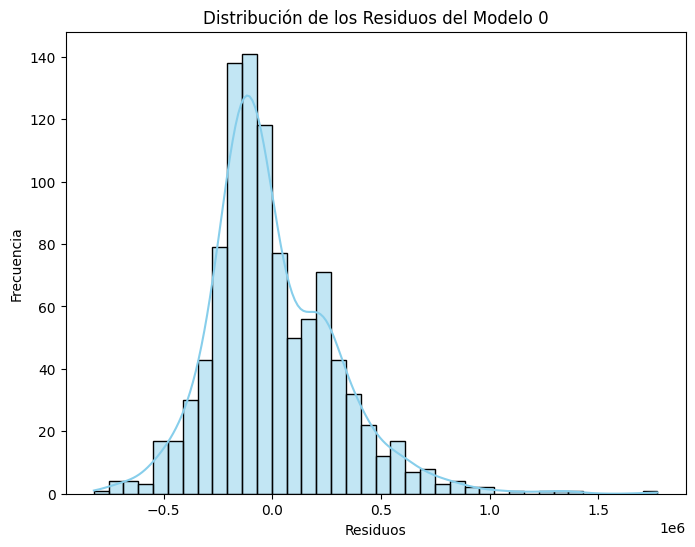

In [130]:
# Para entender mejor la distribución de los residuos, podemos visualizarlos.
# Un histograma es útil para ver la forma de la distribución de los residuos.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='skyblue')
plt.title('Distribución de los Residuos del Modelo 0')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

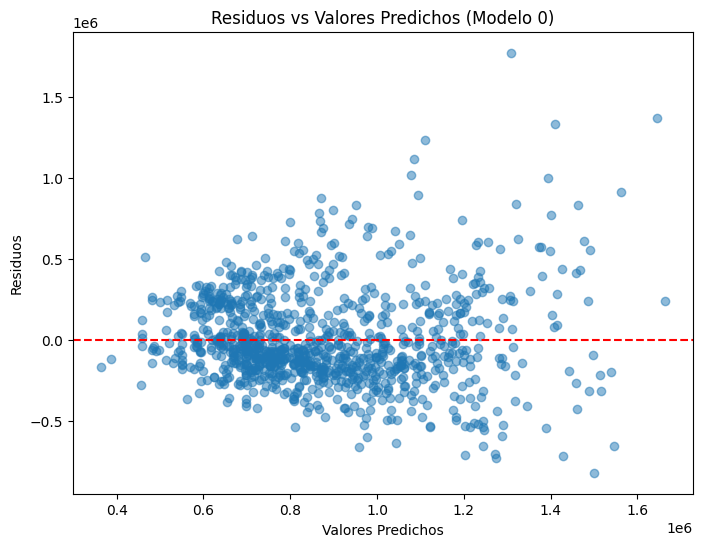

In [131]:
# También podemos graficar los residuos vs los valores predichos para verificar si hay patrones (heterocedasticidad).
# Si los puntos se distribuyen aleatoriamente alrededor de cero, es un buen indicio.
plt.figure(figsize=(8, 6))
plt.scatter(modelo_0.predict(df_train), residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos (Modelo 0)')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [132]:
# definiendo la 'Y' prevista
# Usamos el modelo_0 que ya entrenamos previamente
# .predict() es un método del modelo que toma las características de entrada (x_test en este caso)
# y devuelve las predicciones del modelo para esas entradas.
# x_test contiene las variables predictoras del conjunto de prueba (las características de las casas que el modelo no ha visto antes).
# El resultado de la predicción (los precios de venta estimados por el modelo para el conjunto de prueba)
# se almacena en la variable y_predict.
y_predict = modelo_0.predict(x_test)

In [133]:
# importando el r2_score
from sklearn.metrics import r2_score
# Importamos la función r2_score del módulo metrics de scikit-learn.
# Esta función se utiliza para calcular el coeficiente de determinación (R²),
# que es una métrica clave para evaluar qué tan bien un modelo de regresión lineal
# se ajusta a los datos.

In [134]:
# mostrando el resultado de r²
# Calculamos el coeficiente de determinación (R²) para el modelo en el conjunto de prueba.
# r2_score(y_test, y_predict) compara los valores reales (y_test) con las predicciones del modelo (y_predict).
# Un valor de R² cercano a 1 indica que el modelo explica una gran proporción de la variabilidad
# de la variable dependiente en los datos de prueba.
# round(..., 2) redondea el resultado a 2 decimales para una mejor presentación.
print(f'El coeficiente de determinacion R² para el modelo con los datos de prueba es de :{round(r2_score(y_test, y_predict),2)}')

El coeficiente de determinacion R² para el modelo con los datos de prueba es de :0.39


## **EJERCICIO**

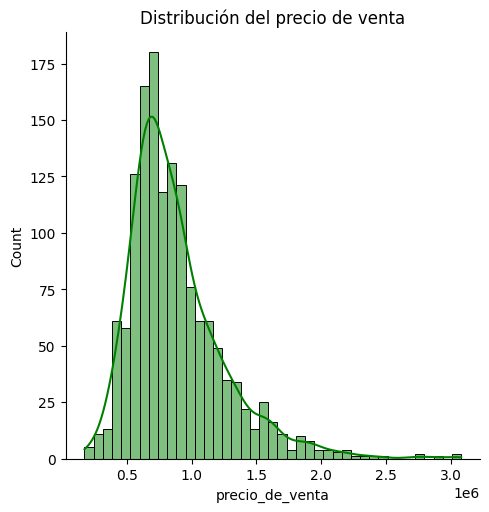

In [135]:
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de venta')
plt.show()

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

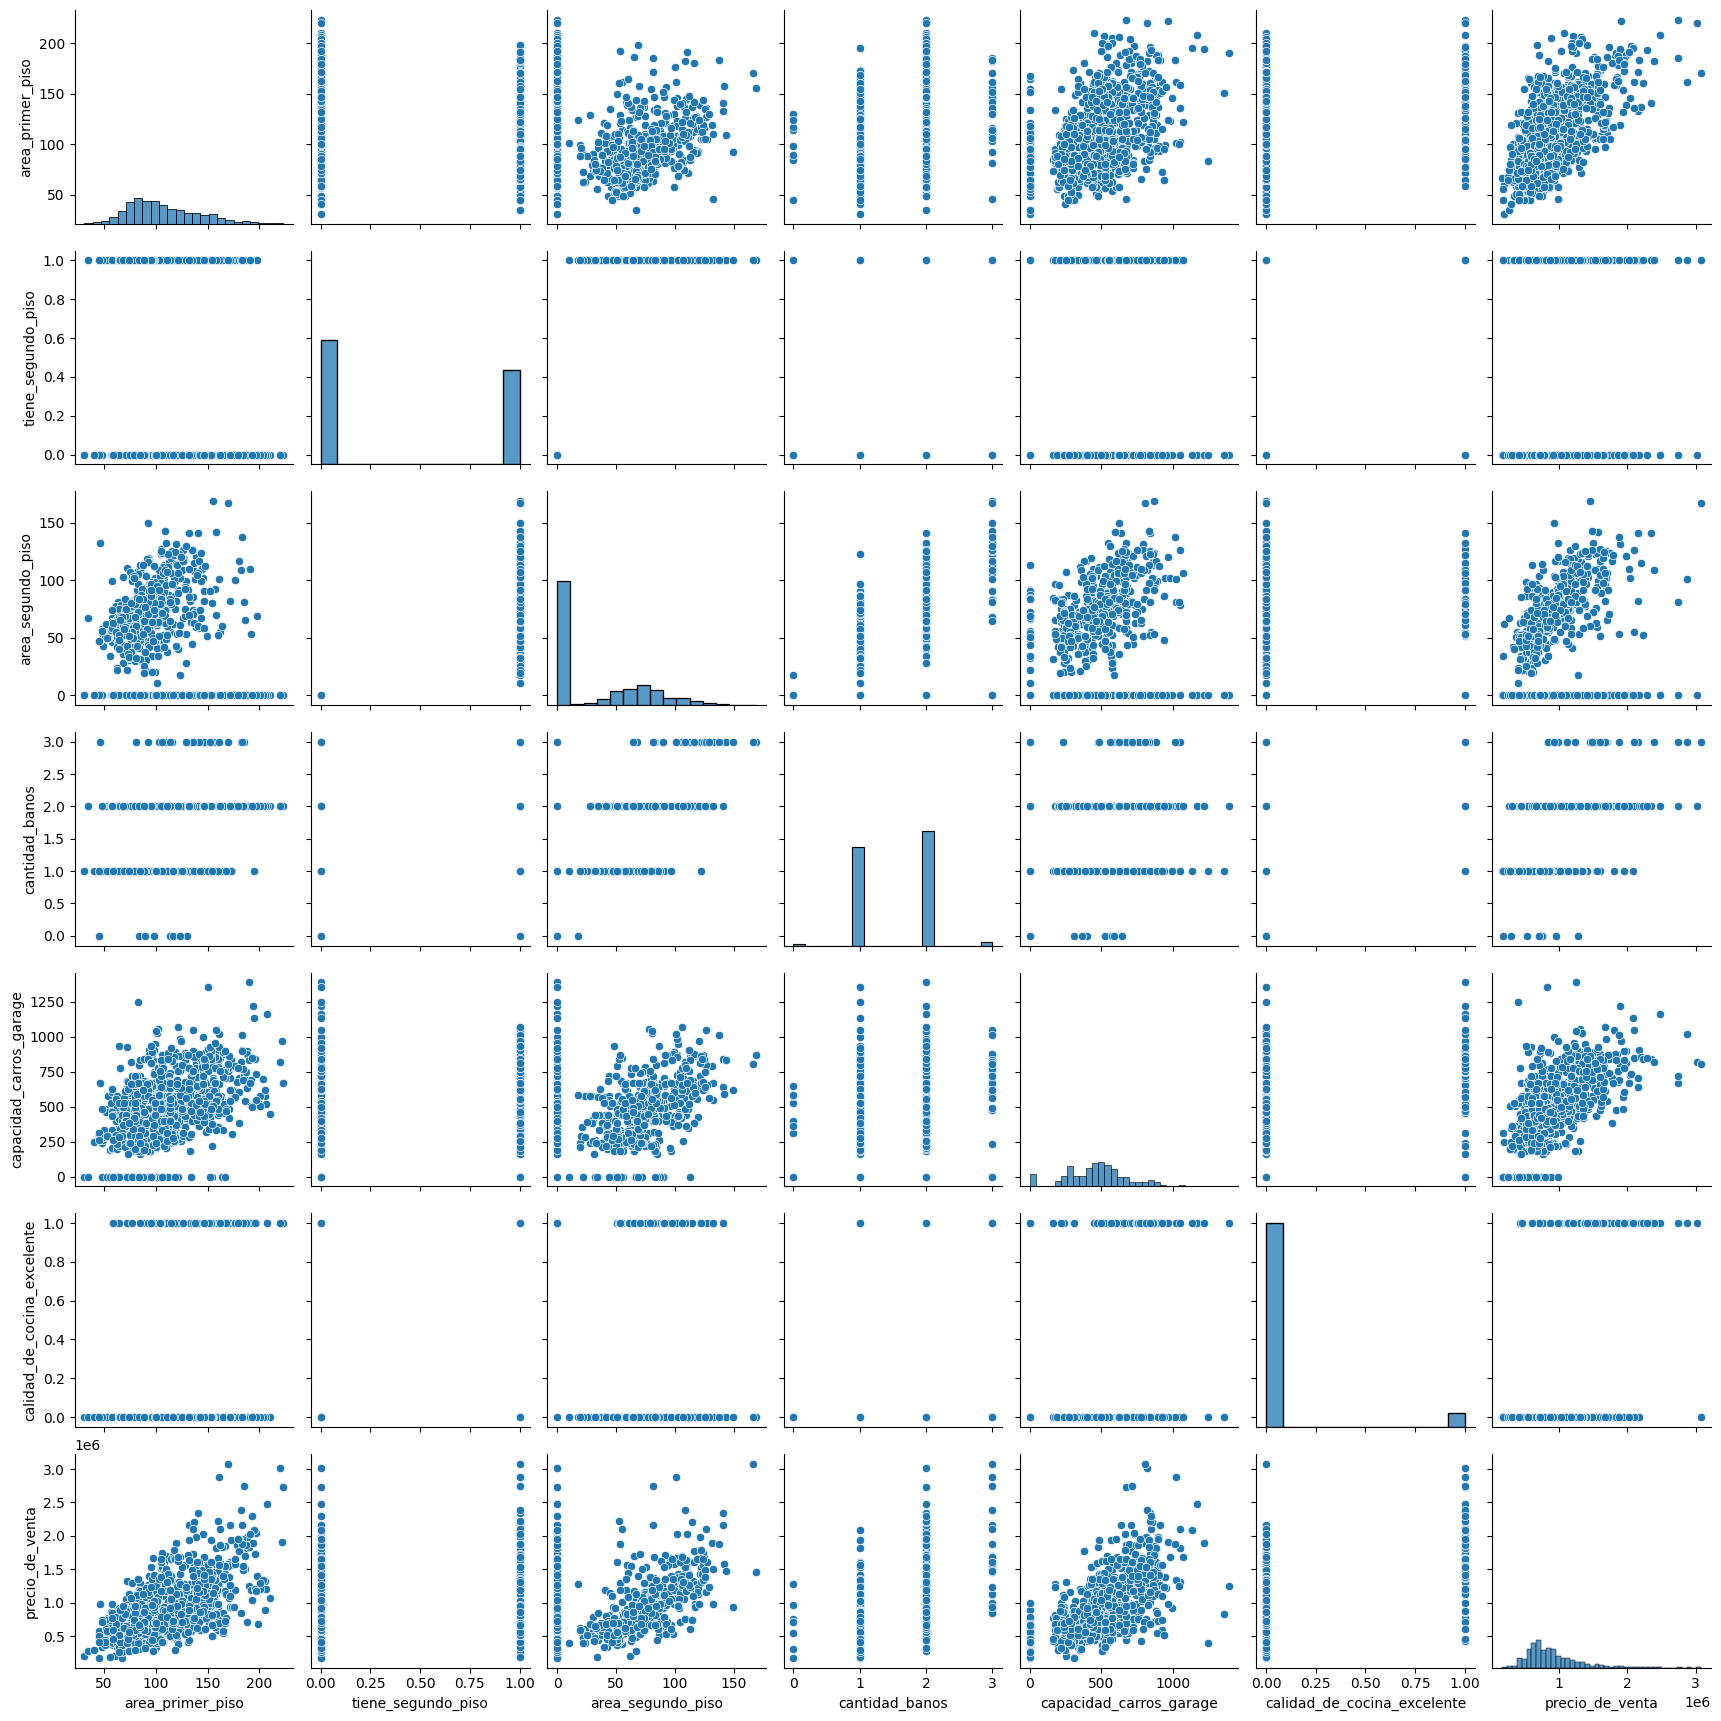

In [136]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)
plt.show()
# nos muestre graficos de dispercion de todos los datos

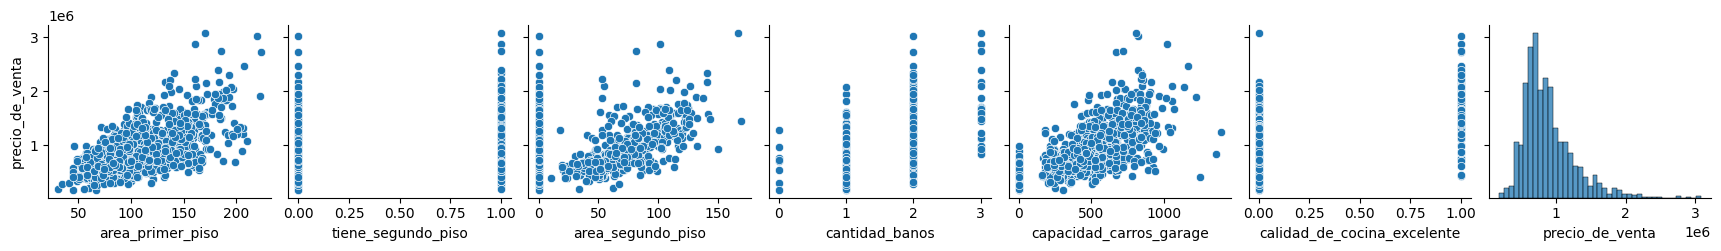

In [137]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos, y_vars='precio_de_venta')
plt.show()
# centralizamos los datos y solo oobservamos los datos que queremos ver o los graficos de dispersion

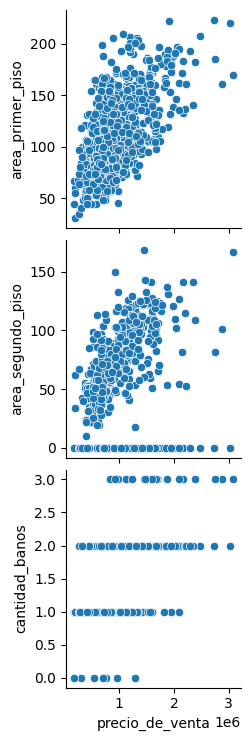

In [138]:
sns.pairplot(datos, y_vars=['area_primer_piso', 'area_segundo_piso', 'cantidad_banos'], x_vars='precio_de_venta')
plt.show()

## Añadiendo factores al modelo

In [139]:
# importando la api de statsmodels
import statsmodels.api as sm

In [140]:
# Añadiendo una constante
x_train = sm.add_constant(x_train)
x_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [141]:
x_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [142]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = sm.OLS(y_train, x_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [143]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train, x_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [144]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train, x_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos','calidad_de_cocina_excelente']]).fit()

In [145]:
# Resumen del modelos
modelos = [modelo_0, modelo_1, modelo_2, modelo_3]

In [146]:
for i , j in enumerate(modelos):
  print(f'************************************************************************************\n********* El resumen del modelo {i} tiene el siguiente resumen **********************\n******')
  print(j.summary())

************************************************************************************
********* El resumen del modelo 0 tiene el siguiente resumen **********************
******
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          2.22e-105
Time:                        15:09:02   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std

In [147]:
for i, j in enumerate(modelos):
  print(f'El coeficiente de determinacion R² para el modelo {i} es de :{round(j.rsquared,2)}')

El coeficiente de determinacion R² para el modelo 0 es de :0.38
El coeficiente de determinacion R² para el modelo 1 es de :0.74
El coeficiente de determinacion R² para el modelo 2 es de :0.71
El coeficiente de determinacion R² para el modelo 3 es de :0.65


## Comparando los modelos
Cuál es el modelo?


In [148]:
# Cuántos parámetros tiene el modelo?
modelo_3.params
# metodo ols

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [149]:
# ponemos a prueba nuestro modelo_3
# Añadiendo una constante en X_test
x_test = sm.add_constant(x_test)
x_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [150]:
x_test.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [151]:
# Previsión con el modelo 3
prevision_3 = modelo_3.predict(x_test[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos','calidad_de_cocina_excelente']])

In [152]:
# Cuál es el r² de la previsión?
print(f'El coeficiente de determinacion R² para el modelo con los datos de prevision es de :{modelo_3.rsquared.round(2)}')

El coeficiente de determinacion R² para el modelo con los datos de prevision es de :0.65


In [153]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente de determinacion R² para el modelo con los datos de entrenamiento es de :{round(r2_score(y_test, prevision_3),2)}')

El coeficiente de determinacion R² para el modelo con los datos de entrenamiento es de :0.64


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [154]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [155]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({
    'const': [1],
    'area_primer_piso': [120],
    'tiene_segundo_piso': [1],
    'cantidad_banos': [2],
    'calidad_de_cocina_excelente': [0],
})


In [156]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)
# como el modelo 1 recibe un solo dato se envie ese dato

,0
0,968146.29


In [157]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)
print(f'El precio del inmueble es de ${modelo_3.predict(nuevo_inmueble).round(2)}')

El precio del inmueble es de $0    1123758.24
dtype: float64


In [158]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [159]:
# Leyendo varias casas?
nuevas_casas = pd.read_csv('/content/precios_casas.csv')
nuevas_casas.head()

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [160]:
nuevas_casas.drop(columns='Id', inplace=True)
# eliminanado la variable casas

In [161]:
nuevas_casas.drop(columns='area_segundo_piso', inplace=True)

In [162]:
nuevas_casas.drop(columns='capacidad_carros_garage', inplace=True)

In [163]:
nuevas_casas.drop(columns='precio_de_venta', inplace=True)

In [164]:
# Añadiendo una constante
nuevas_casas = sm.add_constant(nuevas_casas)
nuevas_casas.head()

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1.0,79.5224,1,2,0
1,1.0,117.2398,0,2,0
2,1.0,85.4680,1,2,0
3,1.0,89.2769,1,1,0
4,1.0,106.3705,1,2,0


In [165]:
nuevas_casas.head()

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1.0,79.5224,1,2,0
1,1.0,117.2398,0,2,0
2,1.0,85.4680,1,2,0
3,1.0,89.2769,1,1,0
4,1.0,106.3705,1,2,0


In [169]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()
precios_casas = pd.DataFrame()
precios_casas['precio_de_venta'] = modelo_3.predict(nuevas_casas).round(2)
precios_casas

,precio_de_venta
0,876049.37
1,885559.82
2,912434.38
3,786707.24
4,1040350.43
...,...
1433,931195.40
1434,1346626.11
1435,1064796.61
1436,631916.62


In [166]:
precios_casas['precio_de_venta'] = modelo_3.predict(nuevas_casas).round(2)
precios_casas

,precio_de_venta
0,876049.37
1,885559.82
2,912434.38
3,786707.24
4,1040350.43
...,...
1433,931195.40
1434,1346626.11
1435,1064796.61
1436,631916.62


In [167]:
precios_casas.head()

,precio_de_venta
0,876049.37
1,885559.82
2,912434.38
3,786707.24
4,1040350.43


## **EJERCICIO**

In [170]:
casa_solictud = pd.DataFrame({
    'const': [1],
    'area_primer_piso': [98],
    'tiene_segundo_piso': [0],
    'cantidad_banos': [1],
    'calidad_de_cocina_excelente': [1]
})


In [171]:
modelo_3.predict(casa_solictud).round(2)

,0
0,1063173.85


In [173]:
modelo_0.predict(nuevo_inmueble['area_primer_piso'])

,0
0,968146.285305


# 5. Investigando el modelo





## **EXTRA - GUARDANDO MODELO**

In [174]:
import pickle

# Nombre del archivo donde se guardará el modelo
nombre_archivo = 'modelo_regresion_lineal_casas.pkl'

# Guardar el modelo en un archivo usando pickle
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(modelo_3, archivo)

## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [175]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# factor de inflacion de la varianza se usa para indetificar el multicolinearidad

In [176]:
explicativas_1 = ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']
explicativas_2 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']
explicativas_3 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos','calidad_de_cocina_excelente']

In [184]:
# VIF 1
# Creamos un DataFrame vacío para almacenar los resultados del VIF.
vif_1 = pd.DataFrame()
# Añadimos una columna 'variable' con los nombres de las variables predictoras.
vif_1['variable'] = explicativas_1
# Calculamos el Factor de Inflación de la Varianza (VIF) para cada variable predictora.
# El VIF mide cuánta de la varianza del coeficiente estimado de una variable
# se infla debido a la multicolinealidad.
# Un VIF alto (generalmente > 5 o > 10) indica una alta multicolinealidad.
vif_1['VIF'] = [vif(x_train[explicativas_1].values, i) for i in range(x_train[explicativas_1].shape[1])]
# Mostramos el DataFrame con los resultados del VIF.
vif_1

# cuando el VIF es alto, indica que la variable está fuertemente correlacionada con otras variables predictoras.

,variable,VIF
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


In [185]:
# VIF 2
vif_2 = pd.DataFrame()
vif_2['variable'] = explicativas_2
vif_2['VIF'] = [vif(x_train[explicativas_2].values, i) for i in range(x_train[explicativas_2].shape[1])]
vif_2

,variable,VIF
0,const,18.791444
1,area_primer_piso,2.189536
2,tiene_segundo_piso,1.669450
3,cantidad_banos,1.605556
4,capacidad_carros_garage,1.513911
5,calidad_de_cocina_excelente,1.181904


In [188]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variable'] = explicativas_3
vif_3['VIF'] = [vif(x_train[explicativas_3].values, i) for i in range(x_train[explicativas_3].shape[1])]
vif_3
# factor de inflacion de la varianza, multicolinearidad

,variable,VIF
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [189]:
# Prevision de los valores de entramineto x_train[explicativas 3]
y_previsto_train = modelo_3.predict(x_train[explicativas_3])

In [190]:
fig = px.scatter(x = y_previsto_train, y = y_train, title='Valor previsto vs real', labels=dict(x='Valor previsto', y='Valor real'))
fig.show()

In [192]:
# residuos
residuos = modelo_3.resid
fig = px.scatter(x = y_previsto_train, y = residuos, title='Residuos vs Valor previsto', labels=dict(x='Valor previsto', y='Residuos'))
fig.show()
# cuando nuestro modelo esta cero su residuo y su valor previsto es correcto

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">